<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb" target="_blank"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2025 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Anna-Lena Erdmann (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-colour-applications"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-colour-applications/HEAD?labpath=2_methodological_approaches%2Feocanvas%2FMulti_sensor_CHL_comparison_WEkEO.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-colour-applications/2_methodological_approaches/eocanvas/Multi_sensor_CHL_comparison_WEkEO.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean colour applications</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** to work with Copernicus Sentinel-3 OLCI marine data from EUMETSAT Data Store
- **<a href="https://data.marine.copernicus.eu/register" target="_blank">A Copernicus Marine Service (CMEMS) account</a>** to work with data from the CMEMS Data Store
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using Sentinel-3 OLCI data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-olci" target="_blank">Learn OLCI (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Multi-sensor chlorophyll comparison in the Baltic Sea using WEkEO serverless functions
<font color="#138D75">**Developed by EUMETSAT in support of the 2025 EGU General Assembly**</font>

### Data used

| Dataset | EUMETSAT collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-3 OLCI level-1b full resolution | EO:EUM:DAT:0409 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_1_EFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">Description</a> | - | - |
| Sentinel-3 OLCI level-2 full resolution | EO:EUM:DAT:0407 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:OL_2_WFR___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">Description</a> | - | - |
| Baltic Sea Multiyear Ocean Colour Plankton, Reflectances and Transparency L3 daily observations | - | - | OCEANCOLOUR_BAL_BGC_L3_MY_009_133 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AOCEANCOLOUR_BAL_BGC_L3_MY_009_133" target="_blank">Description</a> | OCEANCOLOUR_BAL_BGC_L3_MY_009_133 | <a href="https://data.marine.copernicus.eu/product/OCEANCOLOUR_BAL_BGC_L3_MY_009_133/description" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know how to ;

* access Sentinel-3 OLCI ocean colour data via WEkEO
* compare and understand differences between data derived with different chlorophyll-a algorithms
* process Sentinel-3 OLCI data sets using the WEkEO `eocanvas` serverless function architecture
* create a data cube from these processed products, and visualise them in `xcube`
* compare our outputs with regionally tuned ocean colour products from the Copernicus Marine Service
* plot time series of ocean colour data to contextualise bloom events

### Outline

Whilst production by algae is an essential component of marine foodwebs and biogeochemical cycling, extreme blooms [[1]](#ref1) can also pose risks to environmental and human health. Eutrophication, excessive algal growth, as a result of excess nutrients from anthropogenic activities, is a long standing issue in the Baltic sea. Cyanobacteria play a central role in this issue. Whilst cyanobacteria blooms can occur naturally, particularly in warm weather, they can be exacerbated by nutrient inputs. They also play a feedback role in the nutrient loading due to their nitrogen fixing capabilities, and present additional hazards when they bloom. Blooms can affect fish stocks, aquaculture, bathing water quality and tourism, as well as causing rashes, respiratory, and gastrointestinal issues for those exposed.

<figure>
  <img src="https://www.researchgate.net/publication/315534680/figure/fig2/AS:614155694395429@1523437536804/Surface-accumulations-of-cyanobacteria-in-the-southern-Baltic-Sea-in-2013-Photo-credit.png" width='40%'/>
  <img src="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Cyanobacteria_bloom.png" width='51.25%'/>
  <figcaption><a id='figure1'>Figure 1: Cyanobacteria can form bright green blooms that float on the surface (left), making them readily visible in optical measurements taken by satellites such as Sentinel-3A and B and their Ocean and Land Colour Instruments (OLCI) (right) (Credit: (left) <a href="https://tos.org/oceanography/article/globalhab-a-new-program-to-promote-international-research-observations-and" target="blank">Berdalet et al. (2017)</a>, CC-BY-4.0, (right) EUMETSAT). </figcaption>
</figure>

Satellite ocean colour can provide operational views of water quality, with the Ocean and Land Colour Imager (OLCI) sensor aboard the Copernicus Sentinel-3 mission, operated by EUMETSAT, particularly well suited to observing eutrophication and algal blooms such as those occurring in the Baltic Sea. However retreiving accurate geophysical information in these situations is not trivial, and products such a chlorophyll-a derived from a variety of algorithms, can be more/less suitable. 

In this notebook, we will take a variety of different approaches to exploring some Baltic cyanobacterial blooms, taking data from multiple sources. Single sensor approaches will use level-1b and level-2 OLCI ocean colour products, distributed by EUMETSAT and made available by on the <a href='https://wekeo.copernicus.eu/'>WEkEO</a> DIAS cloud platform. These data are distributed on the instrument grid, which changes in time, meaning that we will have to process each image in turn to eventually work with them all concert. We will use the WEkEO `eocanvas` serverless function capability to remotely call the ESA SNAP package to perform this processing. We will compare these products with the multi-sensor, level-3 Baltic chlorophyll product provided by the <a href="https://marine.copernicus.eu/" target="_blank">Copernicus Marine Service</a>. More specifically, we will look at the chlorophyll estimates retrieved using the following algorithms;

| Algorithm | Data Source | Suitability |
|:--------------------:|:-----------------------:|:-------------:|
| NN | Included in OLCI level-2 products | Neural network based approach (NN) for complex waters |
| OC4ME | Included in OLCI level-2 products | Algal pigment concentration for open waters | 
| MPH | Derived from OLCI level-1 products | Maximum Peak Height algorithm, suitable for cyanobacteria dominated waters [[2]](#ref1)|
| MLP | Copernicus Marine Service level-3 Baltic chlorophyll product | Multi-layer perceptron, regionally developed for suitability to the Baltic region [[3]](#ref1)|

#### References

1. <a id='ref1'><a href="https://aslopubs.onlinelibrary.wiley.com/doi/10.4319/lo.1997.42.5_part_2.1132" target="blank">Smayda, T. J. (1997). What is a bloom? A commentary. Limnology and Oceanography, 42(5part2), 1132-1136.</a>
2. <a id='ref2'><a href="https://www.sciencedirect.com/science/article/abs/pii/S0034425712002350" target="blank">Matthews, M. W., Bernard, S., & Robertson, L. (2012). An algorithm for detecting trophic status (chlorophyll-a), cyanobacterial-dominance, surface scums and floating vegetation in inland and coastal waters. Remote Sensing of Environment, 124, 637-652.</a>
3. <a id='ref3'><a href="https://www.mdpi.com/2072-4292/13/16/3071" target="_blank">Brando, V. E., Sammartino, M., Colella, S., Bracaglia, M., Di Cicco, A., D’Alimonte, D., ... & Attila, J. (2021). Phytoplankton bloom dynamics in the baltic sea using a consistently reprocessed time series of multi-sensor reflectance and novel chlorophyll-a retrievals. Remote Sensing, 13(16), 3071.</a>

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Selecting our data using the WEkEO harmonised data access (HDA) adaptor](#section2)
 1. [Step 3: Processing Copernicus Sentinel-3 OLCI data using WEkEO `eocanvas` serverless functions](#section3)
 1. [Step 4: Building data cubes](#section4)
 1. [Step 5: Comparing chlorophyll estimates using `xcube`](#section5)
 1. [Step 6: Exploring level-3 ocean Baltic colour products from the Copernicus Marine Service](#section6)
 1. [Step 7: Comparing chlorophyll time series](#section7)
 1. [Step 8: Conclusions](#section8)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In this section we will set up all the parameters we need to run our notebook.

We will begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../README.md" target="_blank">README</a>**.

**Important: If you are running on WEkEO, you should ensure that you have selected the "*wekeolab*" environment/ipykernel using the menu option on the top right of the panel.**

In [1]:
import warnings                                      # a library that supports managing warning messages
warnings.filterwarnings("ignore")

import os                                            # a library that allows us access to basic operating system commands
import glob                                          # a library that helps us search for files
import datetime                                      # a library that allows us to work with dates and times
import xarray as xr                                  # a library that helps us work efficiently with multi-dimensional arrays
import matplotlib.pyplot as plt                      # a library the provides plotting capability
import numpy as np                                   # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path                             # a library that helps construct system path objects
import getpass                                       # a library to help us enter passwords
import copernicusmarine                              # a library to help us access CMEMS data
from xcube.webapi.viewer import Viewer               # a library that provides the Xcube viewer
from shapely import geometry                         # a library that supports the creation of shape objects, like polygons
import hda                                           # a library that supports WEkEO harmonised data access 
import pandas as pd                                  # a library that supports time series analysis

# set Xcube server if running on WEkEO
if "WEKEO_DATABROKER_URL" in os.environ:
    os.environ["XCUBE_JUPYTER_LAB_URL"] = f"https://jupyterhub.prod.wekeo2.eu/user/{os.environ['JUPYTERHUB_USER']}/"

Lets also now add the eocanvas package.

In [2]:
try:
    from eocanvas.api import Input, Config, ConfigOption # the eocanvas api
except:
    %pip install eocanvas
    from eocanvas.api import Input, Config, ConfigOption # the eocanvas api

from eocanvas.snap.graph import Graph                # the part of the eocanvas library for working with SNAP graphs
from eocanvas.snap import Operator                   # the part of the eocanvas library for defining SNAP graphs nodes
from eocanvas.processes import SnapProcess           # the part of the eocanvas library for defining SNAP processes

In this section of the notebook we will define all the parameters that we need to select, process and download level-1b and level-2 OLCI products, from which we will process our single-sensor chlorophyll products. To find our data of interest, we need to define:

* our region of interest (ROI), which we will also need as a well known text (WKT) format polygon
* the time period over which we want to find data (we'll be looking over a period where we know a bloom occurred).

Lets set these parameters, starting with a square box that we can turn into a WKT polygon for searching.

*Note: our default example is for the Baltic sea in mid-2022, but you can adapt this for other regions and times as you like.*



In [3]:
# defining our bounding box (W, S, E, N) and WKY polygon
bbox = [17, 55.0, 20.0, 60.0]
polygon = [[bbox[0], bbox[1]], [bbox[2], bbox[1]], [bbox[2], bbox[3]], [bbox[0], bbox[3]], [bbox[0], bbox[1]]]
WKT = geometry.Polygon([[p[0], p[1]] for p in polygon])

# defining our search times
start_L2 = datetime.datetime(2022, 7, 3, 0, 0, 0)
end_L2 = datetime.datetime(2022, 7, 4, 23, 59, 0)

# set a switch to download new data if True
process_data = True

Now let us set our `collectionID`s, the references for each collection in the WEkEO catalog (for example; `EO:EUM:DAT:SENTINEL-3:OL_1_EFR___`). These can be found in the <a href="https://wekeo.copernicus.eu/data?view=catalogue">WEkEO Data Catalog</a>. We will store these in a Python dictionary, as follows...

In [4]:
data_sources = {
               "L1B" : {"collectionID" : "EO:EUM:DAT:SENTINEL-3:OL_1_EFR___"}, # this is the OLCI level-1b collection ID, which contains top of atmosphere radiances
               "L2"  : {"collectionID" : "EO:EUM:DAT:SENTINEL-3:OL_2_WFR___"}, # this is the OLCI level-2 collection ID, which contains atmospherically corrected reflectances
               }

Now, lets set a timeliness parameter so that we can select on non-time critical (NT) scenes, which are of a higher quality than near real time data. We will also define our satellites, to include only Sentinel-3B at this stage.

In [5]:
timeliness = "NT"
satellite = "Sentinel-3B"

Finally, lets define a download directory, where we can download our products to;

In [6]:
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

Now we have set our parameters, we can search for some matching data.

<div class="alert alert-warning" role="alert">

## <a id='section99'></a>Defining functions
[Back to top](#TOCTOP)

</div>

#### Defining a quick function to parse dates

Before we move on to our analysis, we are going to define a quick function for use later on. We define functions when we have some code that we want to use repeatedly later on. In this section we define a quick functions that we will use to search by dates in a SAFE format filename

In [7]:
def extract_first_date(filename):
    parts = filename.split('_')
    for part in parts:
        try:
            return datetime.datetime.strptime(part, "%Y%m%dT%H%M%S")
        except ValueError:
            continue
    return None  # fallback if no date found

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Selecting our data using the WEkEO harmonised data access (HDA) adaptor
[Back to top](#TOCTOP)

</div>

<div class="alert alert-block alert-success">

### Accessing data using the WEkEO HDA adaptor

Downloading from WEkEO harmonised data access (HDA) API is facilitated by a data access client. If you are currently working on the WEkEO JupyterHub, this client will already be installed. Otherwise, if you have followed the installation guidelines in the yml file provided with this repository, you will also have the client installed. If not, you are welcome to view the <a href="https://github.com/ecmwf/hda" target="_blank">source code</a> for more information and further instructions.

In order to allow us to download data using the WEkEO HDA API, we need to provide our credentials. To do this, we need to create a file called `.hdarc` in our home directory. For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system. In this file we need to add the following information exactly as follows;

`user:<your_user_name>`<br>
`password:<your_password>`

You must replace `<your_user_name>` and `<your_password>` with the information from your WEkEO account (if you don't have one yet, please register at <a href="https://www.wekeo.eu/" target="_blank">https://www.wekeo.eu/</a>. Once you have entered these credentials in the file, the `hda` client will automatically read in the credentials from the file when you use it.

If you need help with creating this file, you can use our WEkEO HDA API section of our <a href="../../working-with-python/API_authentication.ipynb">API helper notebook</a> to assist you.

*Note: take care not to share your user name and password*

</div>

Now that we have our credentials set up we can set-up and instance of the HDA client, as below;

In [8]:
c = hda.Client()

Now, we can loop through our data sources dictionary, using the search parameters we defined above to find the matching products

In [9]:
for data_source in data_sources:

    # need to check on auth here
    query = {
            "dataset_id": data_sources[data_source]["collectionID"],
            "dtstart"   : start_L2.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "dtend"     : end_L2.strftime("%Y-%m-%dT%H:%M:%S.000Z"),
            "timeliness": timeliness,
            "bbox"      : bbox,
            "sat"       : satellite
            }
    
    results = c.search(query)
    data_sources[data_source]["results"] = results
    data_sources[data_source]["urls"] = results.get_download_urls()
    data_sources[data_source]["product_names"] = [results.results[i]["id"] for i in range(len(results))]

    print(f"Found: {len(results)} products for {data_sources[data_source]['collectionID']}")

Found: 2 products for EO:EUM:DAT:SENTINEL-3:OL_1_EFR___
Found: 2 products for EO:EUM:DAT:SENTINEL-3:OL_2_WFR___


<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Processing Copernicus Sentinel-3 OLCI data using WEkEO `eocanvas` serverless functions
[Back to top](#TOCTOP)

</div>

Should we wish, we could now directly download the entirety of the level-1b and level-2 products that come from our search, using the following command:

`data_sources["L1B"]["results"].download(download_dir=download_dir)`

or

`data_sources["L2"]["results"].download(download_dir=download_dir)`

However, OLCI level-1b and level-2 scenes are typically ~900 Mb and ~500 Mb in size, respectively. Furthermore, these are not yet fully processed for our needs and so it would be more efficient to process these results remotely, subsequently downloading only the final, much smaller products. This is what we will do.

We are going to process our products using a <a href="https://step.esa.int/main/toolboxes/snap/">ESA SNAP</a> software package. Access to this package is managed through the WEkEO `eocanvas` python library, which allows us to run SNAP as a serverless function. However, we need to provide instructions to SNAP in order to define the processes we want to perform. We achieve this by providing `eocanvas` an XML format "Graph" that SNAP can ingest using its command-line based Graph Processing Tool (GPT). Lets look at these graphs and then set-up our `eocanvas` process.

We have included two example graphs in the `SNAP_graphs` folder, one for L2 processing, which we will focus on, and one for L1 processing. Lets load these into our `data_sources` dictionary using the `Graph` method from `eocanvas`.

In [10]:
data_sources["L1B"]["graph"] = Graph.from_uri(os.path.join(os.getcwd(), "SNAP_graphs", "SNAP_GPT_graph_OLCI_L1B_subset_MphChl_reproject_eocanvas_template.xml"))
data_sources["L2"]["graph"] = Graph.from_uri(os.path.join(os.getcwd(), "SNAP_graphs", "SNAP_GPT_graph_OLCI_L2_subset_flag_reproject_chl_eocanvas_template.xml"))

Lets take a look...

In [11]:
# show it
data_sources["L2"]["graph"].nice_view()

We can see that a number of steps are defined, each contained within a single "Node". We have following nodes:

* Read - where we read our inpur product
* BandMathsNN - where we apply the relevant quality flags to our OLCI complex water chlorophyll product (CHL_NN) - parallel
* BandMathsOC4ME- where we apply the relevant quality flags to our OLCI standard chlorophyll product (CHL_OC4ME) - parallel
* Merge - where we merge the band maths products together
* Reproject - where we place the products on a regular grid
* Write - where we output for final product

However, we can also see that one node has been deliberately commented out; "subset". This is intentional as we will now add it using `eocanvas`. We can do this using the `Operator` method to define new nodes, as follows;

In [12]:
for data_source in data_sources:

    # load the graph
    graph = data_sources[data_source]["graph"]

    # define a subset node
    subset = Operator("Subset")
    subset.geoRegion = str(WKT)
    subset.fullSwath = "false"
    subset.copyMetadata = "false"

    # define subset bands, if required
    if "L2" in data_source:
        subset.bandNames = "CHL_NN,CHL_OC4ME,latitude,longitude,WQSF_lsb,WQSF_msb"

    # add subset node to graph
    graph.add_node(subset, "Subset", "Read")
    
    # write it back to the dictionary
    data_sources[data_source]["graph"] = graph

Lets look again at our graph, and check what has been added at the bottom;

In [13]:
data_sources["L2"]["graph"].nice_view()

We can see that we now have a Subset node that includes the WKT that we specified at the top of this notebook.

There are two other important things to note. Firstly, that the addition of the Subset node now connects the Read node to the BandMatchs nodes via their source products. Secondly, that the Read and Write nodes have placeholder string in them (`$img1` and `$output`), which we use in eocanvas to connect the graph to our Sentinel-3 OLCI products, as supplied by the HDA, and our eventual download.

Our graph is now ready, so lets launch it!

In [17]:
data_source = "L2"

if process_data:
    for url, product_name in zip(data_sources[data_source]["urls"], data_sources[data_source]["product_names"]):
        inputs = Input(key="img1", url=url)
        config = Config(key="img1", options=ConfigOption(uncompress=True, sub_path="xfdumanifest.xml"))
        process = SnapProcess(snap_graph=data_sources[data_source]["graph"], eo_config=config, eo_input=inputs)
        process.prepare_inputs()
    
        job = process.submit()
        process.run(job, download_dir=download_dir)
    
        # rename output  
        downloaded_file = os.path.join(download_dir, os.path.basename(job.results[0].title))
        output_file = os.path.join(download_dir, product_name.replace(".SEN3", "_eocanvas_processed.nc"))
        os.rename(downloaded_file, output_file)

Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: accepted at 2025-04-23T15:35:41.453438
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:35:51.658656
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:36:02.959808
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:36:15.253328
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:36:28.719628
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:36:43.546670
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:36:59.978157
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:37:17.904742
Job: 8f80464f-e663-5eca-866b-9b42ed855133 - Status: running at 2025-04-23T15:37:37.543891
Job: 6a58ad12-33bf-5546-a315-12bddcd1ee2f - Status: accepted at 2025-04-23T15:38:02.374684
Job: 6a58ad12-33bf-5546-a315-12bddcd1ee2f - Status: running at 2025-04-23T15:38:12.724568
Job: 6a5

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Building data cubes
[Back to top](#TOCTOP)

</div>

No we have processed some of our data using `eocanvas` we can construct a data cube from it.

In [18]:
#Bring to a common grid
resolution = 0.01
new_lons = np.arange(bbox[0], bbox[1] + resolution, resolution)
new_lats = np.arange(bbox[2], bbox[3] + resolution, resolution)

In [20]:
files = glob.glob(os.path.join(download_dir, f"*WFR____*"))
files_sorted = sorted(files, key=extract_first_date)

ds_all = []
for file in files_sorted:
    print(file)

    ds = xr.open_dataset(file)
    T = datetime.datetime.strptime(os.path.basename(file).split("_")[7], "%Y%m%dT%H%M%S")
    T = pd.to_datetime([T]).to_numpy(dtype='datetime64[ns]')
    ds = ds.expand_dims({"time": T})
    ds = ds.interp(lon=new_lons, lat=new_lats, method="linear")
    ds_all.append(ds)

cube = xr.concat(ds_all, dim="time")
cube = cube.chunk({"time": 1})

for CHL_var in ["Filtered_CHL_NN", "Filtered_CHL_OC4ME", "Filtered_CHL_MPH"]:
    try:
        cube[CHL_var].attrs["units"] = "mg.m-3"
    except:
        pass
        
cube.to_zarr(f"OLCI_L2_CHL_cube.zarr", mode="w", consolidated=True);

/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/eocanvas/products/S3B_OL_2_WFR____20220703T093100_20220703T093400_20220704T221726_0179_067_364_1980_MAR_O_NT_003_eocanvas_processed.nc
/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/eocanvas/products/S3B_OL_2_WFR____20220704T090449_20220704T090749_20220705T212437_0179_067_378_1980_MAR_O_NT_003_eocanvas_processed.nc


<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Comparing chlorophyll estimates using `xcube`

[Back to top](#TOCTOP)

</div>

Lets open our cube using xarray

In [21]:
WFR_cube = xr.open_zarr("OLCI_L2_CHL_cube.zarr")

Now we can configure our xcube viewer to display this

In [22]:
viewer = Viewer(
    server_config={
        "Styles": [
            {
                "Identifier": "CHL",
                "ColorMappings": {
                    "Filtered_CHL_NN": {"ValueRange": [0.0, 20.0], "ColorBar": "viridis"},
                    "Filtered_CHL_OC4ME": {"ValueRange": [0.0, 20.0], "ColorBar": "viridis"},
                    "Filtered_CHL_MPH": {"ValueRange": [0.0, 20.0], "ColorBar": "viridis"},
                    "CHL": {"ValueRange": [0, 20.0], "ColorBar": "viridis"}
                },
            }        
        ]
    }
)

404 GET /viewer/static/js/2.9881f7d8.chunk.js (127.0.0.1) 1.42ms
404 GET /viewer/static/js/main.fb983784.chunk.js (127.0.0.1) 1.99ms
404 GET /viewer/static/js/2.9881f7d8.chunk.js (127.0.0.1) 0.80ms
404 GET /viewer/static/js/main.fb983784.chunk.js (127.0.0.1) 0.76ms
404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 5.29ms


In [23]:
viewer.add_dataset(WFR_cube, title="L2 CHL Test", style="CHL")
viewer.info()

Server: http://localhost:8000
Viewer: http://localhost:8000/viewer/?serverUrl=http://localhost:8000


Prior to this tutorial, we prepared two much larger data cubes that span the whole month of July 2022. One of these cubes uses an graph identical to the one shown above above for the CHL_NN and CHL_OC4ME products available at in the OLCI level-2 products. The other cube runs the L1B graph, also included in SNAP_Graphs folder to derive the MPH chlorophyll product. These two cubes are hosted on WEkEO S3 storage, and can be added directly to our xcube viewer. Both cubes were generated using exactly the same approach as described above. This workflow will work from any S3 storage.

Lets connect to these remote cubes...

In [24]:
ds_L1 = xr.open_zarr(
    "s3://wekeo/egu2025/OLCI_L1_CHL_cube.zarr",
    consolidated=True,
    storage_options={"anon" : True,
        "client_kwargs": {
            "endpoint_url": "https://s3.waw3-2.cloudferro.com"
        }
    }
)

ds_L2 = xr.open_zarr(
    "s3://wekeo/egu2025/OLCI_L2_CHL_cube.zarr",
    consolidated=True,
    storage_options={"anon" : True,
        "client_kwargs": {
            "endpoint_url": "https://s3.waw3-2.cloudferro.com"
        }
    }
)

..and add them to our viewer.

In [25]:
viewer.add_dataset(ds_L2, title="L2 CHL Cube", style="CHL")
viewer.add_dataset(ds_L1, title="L1 CHL Cube", style="CHL")
viewer.info()

Server: http://localhost:8000
Viewer: http://localhost:8000/viewer/?serverUrl=http://localhost:8000


>> Compare the views for: 2022-07-03 09:31:00

Lets also extract an area-averaged time series from these remote products. First we will set a threshold (`n_cut`), below which we will discard the area average, assuming that there are not enough points for a good representation.

In [49]:
n_cut = 10000

In [51]:
CHL_MPH = ds_L1["Filtered_CHL_MPH"].where(ds_L1["Filtered_CHL_MPH"].count(dim=["lon", "lat"]) > n_cut)
CHL_NN = ds_L2["Filtered_CHL_NN"].where(ds_L2["Filtered_CHL_NN"].count(dim=["lon", "lat"]) > n_cut)
CHL_OC4ME = ds_L2["Filtered_CHL_OC4ME"].where(ds_L2["Filtered_CHL_OC4ME"].count(dim=["lon", "lat"]) > n_cut)

Now we will calculate the averages.

*Note: we are forcing the computation here, so this cell may take some time.*

In [52]:
CHL_OC4ME_ave = CHL_OC4ME.mean(dim=["lon", "lat"]).compute()
CHL_NN_ave = CHL_NN.mean(dim=["lon", "lat"]).compute()
CHL_MPH_ave = CHL_MPH.mean(dim=["lon", "lat"]).compute()

We'll save this data for our final plot, which is made below.

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Exploring level-3 ocean Baltic colour products from the Copernicus Marine Service
[Back to top](#TOCTOP)

</div>

To generate a long time series of ocean colour measurements requires combining data from multiple satellite missions, and applying algorithms that are suitable for this, taking in to account the different spectral configurations etc of the missions. For example, above we apply the MPH which only uses wavebands available on Sentinel-3 OLCI, and the historical MERIS mission. This limits it's suitability for application to long time series. Further it is designed for focusing on blooms, and doesn't account for other forms of variability which are present in the Baltic sea.

As an optimal approach, we will access data from the Copernicus marine service where a regionally trained neural network using multiple algorithmic approaches is applied to multiyear records of ocean colour [[3]](#ref3). We will access data from the Copernicus Marine Service using the Copernicus Marine API. This loads data directly into memory, without the need to write anythin to a file.

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [26]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

In [27]:
# defining our L3 search times
start_oper_L3 = datetime.datetime(2022, 7, 1, 0, 0)
end_oper_L3 = datetime.datetime(2022, 7, 31, 23, 59)

start_clim_L3 = datetime.datetime(2017, 1, 1, 0, 0)
end_clim_L3 = datetime.datetime(2024, 12, 31, 23, 59)

CMEMS_product = "cmems_obs-oc_bal_bgc-plankton_my_l3-multi-1km_P1D"
CMEMS_variables = ['CHL']

Now we are authenticated, let's connect to our data set using the `open_dataset` method in the `copernicusmarine` toolkit.

In [28]:
ds_L3 = copernicusmarine.open_dataset(
               dataset_id=CMEMS_product,
               variables=CMEMS_variables,
               minimum_longitude=bbox[0],
               maximum_longitude=bbox[2],
               minimum_latitude=bbox[1],
               maximum_latitude=bbox[3],
               start_datetime=start_oper_L3.strftime("%Y-%m-%dT00:00:00.000Z"),
               end_datetime=end_oper_L3.strftime("%Y-%m-%dT23:59:59.000Z"))

INFO - 2025-04-23T13:41:55Z - Dataset version was not specified, the latest one was selected: "202411"
INFO - 2025-04-23T13:41:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-23T13:41:55Z - Service was not specified, the default one was selected: "arco-geo-series"


Lets now add our Dataset to the viewer, associating it with our defined *style*, and show the viewer. The viewer will open the latest "time slice" of the data set, but you can iterate it in time using the arrow buttons and click on any "populated" pixel to see a time series. You can also animate the whole time series using the "play" button.

Explore the tool to see how the gridded CHL field changes in and around our bloom event.

In [29]:
viewer.add_dataset(ds_L3, title="Baltic CHL", style="CHL")
viewer.info()

Server: http://localhost:8000
Viewer: http://localhost:8000/viewer/?serverUrl=http://localhost:8000


<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Comparing chlorophyll time series - WIP
[Back to top](#TOCTOP)

</div>

For this final part of our analysis, we will download some data from the Copernicus Marine Service. Lets start by defining a file name (`output_filename`) our downloaded data, and clear any existing file of the same name.

In [30]:
output_filename=os.path.join(download_dir, "CMEMS_L3_BGC_CHL.nc")
if os.path.exists(output_filename):
    os.remove(output_filename)

To download data, rather than use the `open_dataset` option we used in the previous section, we use the `subset` method, which will write the data to our defeined output file.

In [31]:
copernicusmarine.subset(
               dataset_id=CMEMS_product,
               variables=CMEMS_variables,
               minimum_longitude=bbox[0],
               maximum_longitude=bbox[2],
               minimum_latitude=bbox[1],
               maximum_latitude=bbox[3],
               start_datetime=start_clim_L3.strftime("%Y-%m-%dT00:00:00.000Z"),
               end_datetime=end_clim_L3.strftime("%Y-%m-%dT23:59:59.000Z"),
               output_filename=output_filename)

INFO - 2025-04-23T13:42:55Z - Dataset version was not specified, the latest one was selected: "202411"
INFO - 2025-04-23T13:42:55Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-04-23T13:42:56Z - Service was not specified, the default one was selected: "arco-time-series"
WARNING - 2025-04-23T13:42:56Z - Some or all of your subset selection [2017-01-01 00:00:00, 2024-12-31 23:59:59] for the time dimension  exceed the dataset coordinates [1997-09-04 00:00:00, 2024-09-09 00:00:00]
INFO - 2025-04-23T13:42:56Z - Downloading using service arco-time-series...
INFO - 2025-04-23T13:42:57Z - <xarray.Dataset> Size: 869MB
Dimensions:    (time: 2809, latitude: 455, longitude: 170)
Coordinates:
  * latitude   (latitude) float32 2kB 55.0 55.01 55.02 ... 59.97 59.98 59.99
  * longitude  (longitude) float32 680B 17.0 17.02 17.04 ... 19.96 19.98 20.0
  * time       (time) datetime64[ns] 22kB 2017-01-01 2017-01-02 ... 2024-09-09
Data variables:
    CHL        (time, l

  Y


INFO - 2025-04-23T13:43:01Z - Writing to local storage. Please wait...


  0%|          | 0/9750 [00:00<?, ?it/s]

INFO - 2025-04-23T13:43:31Z - Successfully downloaded to /Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/eocanvas/products/CMEMS_L3_BGC_CHL.nc


PosixPath('/Users/benloveday/Code/git_repositories/CMTS/internal/ocean/applications/ocean-colour-applications/2_methodological_approaches/eocanvas/products/CMEMS_L3_BGC_CHL.nc')

Next, lets process our downloaded data. We beginning by opening the relevant file...

In [32]:
ds_L3 = xr.open_mfdataset(output_filename)

We don't want to take an area mean when the data is very sparse, so we will discard any time slice where we have less than "`n_cut`" points (n_cut by default is set to 10000)

In [33]:
ds_L3 = ds_L3.where(ds_L3["CHL"].count(dim=["longitude", "latitude"]) > n_cut)

In [63]:
CHL = np.log10(ds_L3["CHL"].mean(dim=['latitude', 'longitude']).compute())
time = ds_L3["time"].compute()

Finally, lets calculate a mean seasonal climatology so that we can compare our year of interest with the historical average.

In [64]:
CLIM = CHL.groupby("time.dayofyear").mean()
CLIM = CLIM[ds_L3.time.dt.dayofyear - 1]
ds_L3.close()

We are ready to make our final plot...

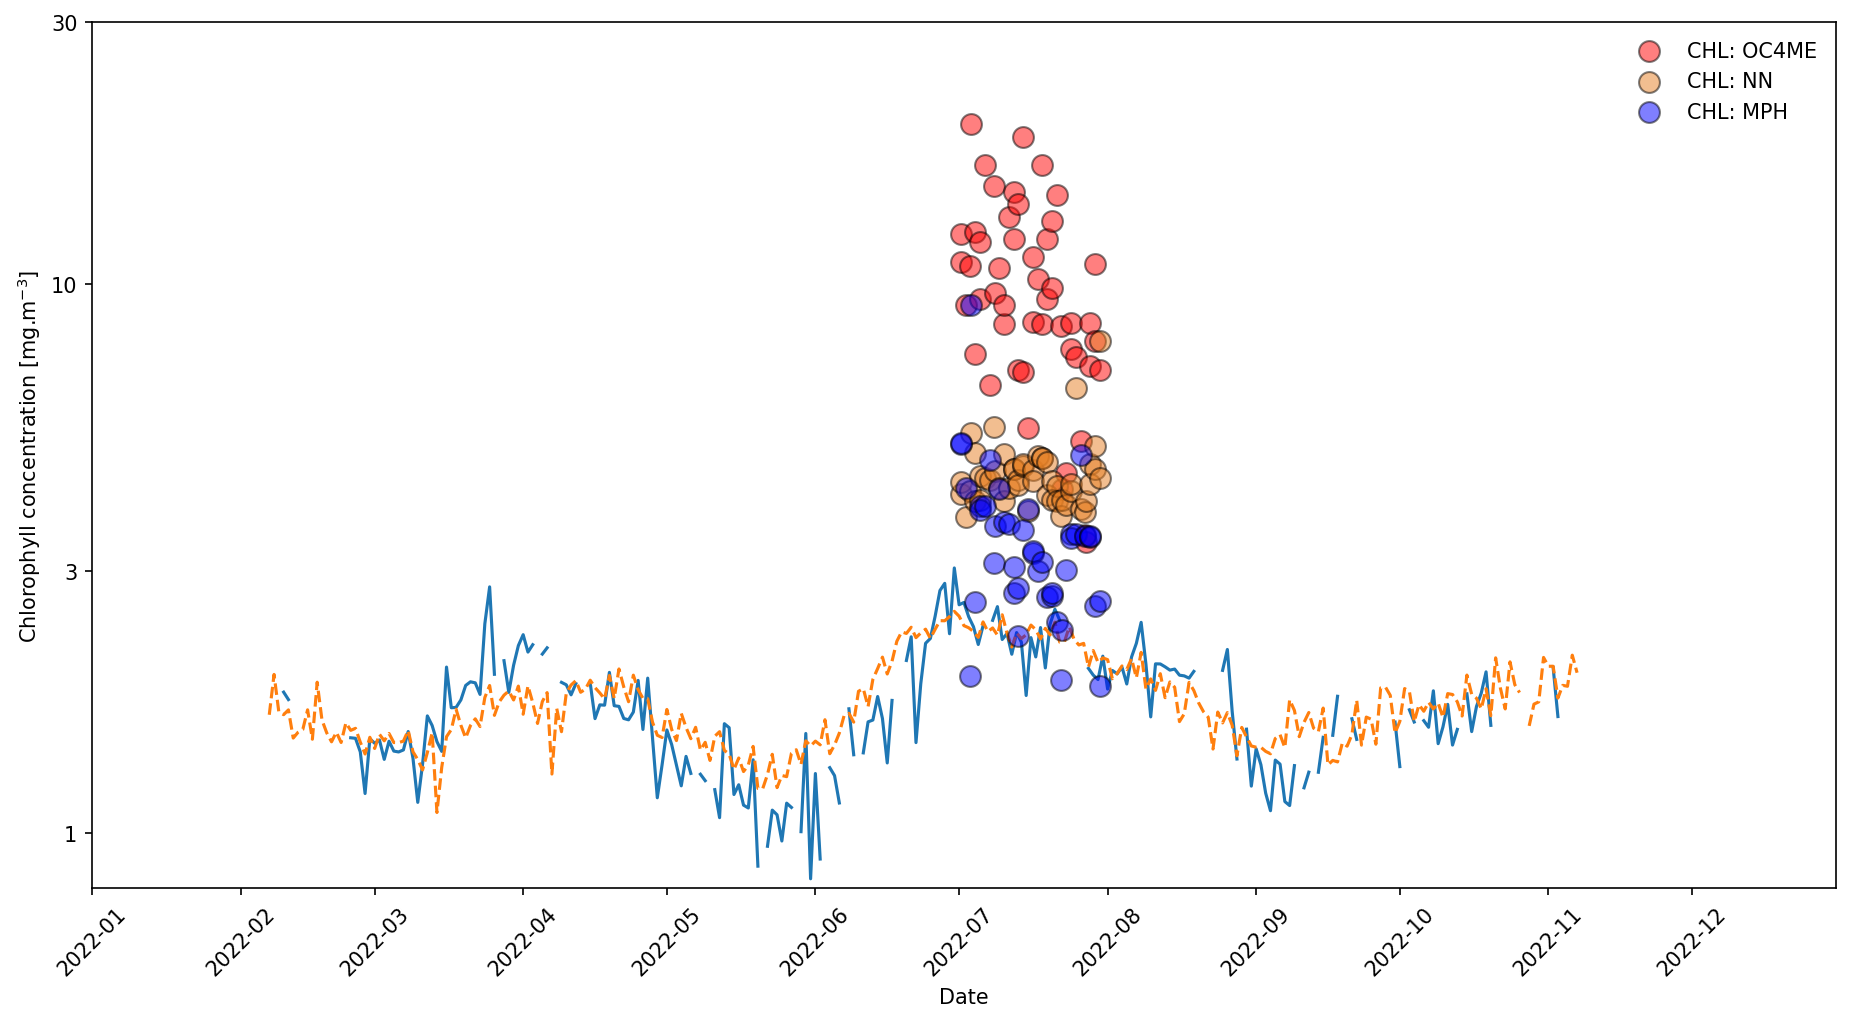

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7.5), dpi=150)
plt.plot(time, CHL)
plt.plot(time, CLIM, linestyle="--")

plots = []
for plot_var, col in zip([CHL_OC4ME_ave, CHL_NN_ave, CHL_MPH_ave], ["r", "#E67E22", "b"]):
    p1 = plt.scatter(plot_var.time, np.log10(plot_var), s=100, alpha=0.5, c=col,edgecolor="k", zorder=100)
    plots.append(p1)

plt.legend(plots, ["CHL: OC4ME", "CHL: NN", "CHL: MPH"], frameon=False)
plt.xlabel("Date")
plt.ylabel("Chlorophyll concentration [mg.m$^{-3}$]");
plt.xlim([datetime.datetime(2022, 1, 1), datetime.datetime(2022, 12, 31)])
plt.xticks(rotation=45)
ticks = [0, np.log10(3), 1, np.log10(30)]
plt.ylim([-0.1, max(ticks)])
plt.yticks(ticks, [round(10**i) for i in ticks])

plt.show()

From the time series of Chlorophyll-a concentration we can see a general seasonal cycle of elevated chlorophyll-a in the spring, followed by a decrease, and then a further elevation over the summer and early autumn. This can be observed in the data for 2022 (blue line), and the 10 year daily average climatology (dashed orange line). We can see that the two standard chlorophyll-a estimates are signficantly higher than the MPH, which agrees very closely with the estimate from the level-3 product. 

We can also observe the high level of variability around the average, seeing the spikes where the blue line deviates. However, how do we know if these are cyanobacteria blooms or not? Accurate chlorophyll-a estimation for cyanobacteria blooms is challenging, with a lack of insitu data, the complex optics of floating/submerged blooms, and further complications from the optical complexity of coastal ocean waters and atmospheres.

In the publication by Brando et al. (2021) [[3]](#ref3) which underlies the Copernicus Marine Service data used above, a threshold technique was used to identify surface and subsurface blooms in both spring and summer, utilising the available remote sensing reflectance at 555nm and 670 nm in the underlying merged satellite data. This allowed for a more robust estimation of bloom patterns as a general indicator of eutrophication in the region.



<div class="alert alert-info" role="alert">

## <a id='section8'></a>8. Conclusions - WIP
[Back to top](#TOCTOP)

</div>

In this notebook we have seen that satellite data is capable of providing a detailed view of cyanobacteria bloom events. Modern sensors such as the OLCI sensors aboard the Sentinel-3 satellites can be exploted, thanks to their unique spectral bands, to develop specific algorithms for detection of blooms. Longer time series of ocean colour data are being developed to support the assessment of the role of blooms in eutrophication trends in regions such as the Baltic sea. As the time series of OLCI data lengthens, and new opportunities from hyperspectral missions are realised, further opportunities will arise to expand this work.



### Suggested next steps

To further develop your skills and knowledge, and expand the application of this notebook you could try:
* Applying the MPH algorithm in SNAP to a time series of OLCI images
* Accessing the regional Baltic reflectance products from the Copernicus marine service, applying the thresholds to the values at 555 nm and 670 nm to identify blooms.


<hr>
<a href="../../../Index.ipynb" target="_blank"><< Index</a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>